In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout
import tensorflow as tf
from tensorflow import keras

In [2]:
import pandas as pd

In [3]:
stock=pd.read_csv("intel.csv",index_col='Date',parse_dates=True)

In [4]:
stock

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2024-04-01,31.88,44.32,45.40,30.65,37.25M,-27.82%
2024-03-01,44.17,43.41,46.63,40.57,949.24M,2.60%
2024-02-01,43.05,43.15,45.27,41.60,815.50M,-0.07%
2024-01-01,43.08,49.20,50.30,42.36,1.00B,-14.27%
2023-12-01,50.25,44.36,51.28,41.17,829.55M,12.42%
...,...,...,...,...,...,...
2010-05-01,21.42,22.98,23.44,19.90,1.83B,-6.22%
2010-04-01,22.84,22.40,24.37,22.16,1.55B,2.47%
2010-03-01,22.29,20.68,22.75,20.26,1.29B,8.57%


In [5]:
stock.describe()

,Price,Open,High,Low
count,172.000000,172.000000,172.000000,172.000000
mean,36.431105,36.435407,38.731802,34.046279
std,12.337510,12.412705,13.402455,11.328205
min,17.670000,17.940000,19.620000,17.600000
25%,25.507500,25.030000,26.890000,24.367500
50%,34.580000,34.490000,35.880000,32.265000
75%,47.765000,47.782500,50.662500,43.665000
max,64.000000,64.720000,69.290000,58.520000


In [6]:
stock.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2024-04-01,31.88,44.32,45.40,30.65,37.25M,-27.82%
2024-03-01,44.17,43.41,46.63,40.57,949.24M,2.60%
2024-02-01,43.05,43.15,45.27,41.60,815.50M,-0.07%
2024-01-01,43.08,49.20,50.30,42.36,1.00B,-14.27%
2023-12-01,50.25,44.36,51.28,41.17,829.55M,12.42%


In [7]:
stock.isnull()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2024-04-01,False,False,False,False,False,False
2024-03-01,False,False,False,False,False,False
2024-02-01,False,False,False,False,False,False
2024-01-01,False,False,False,False,False,False
2023-12-01,False,False,False,False,False,False
...,...,...,...,...,...,...
2010-05-01,False,False,False,False,False,False
2010-04-01,False,False,False,False,False,False
2010-03-01,False,False,False,False,False,False


In [9]:
stock.isnull().sum()

Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

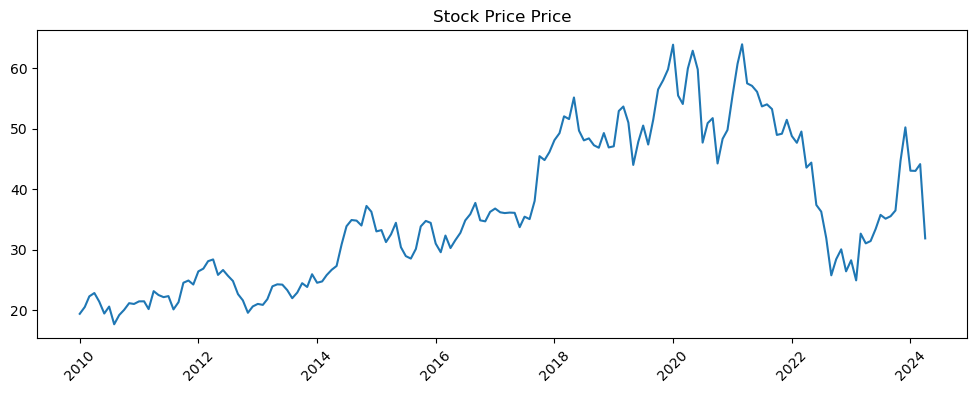

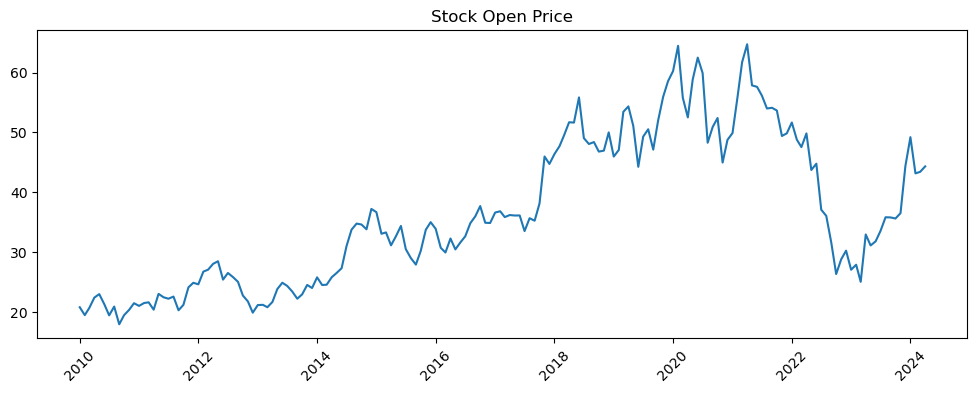

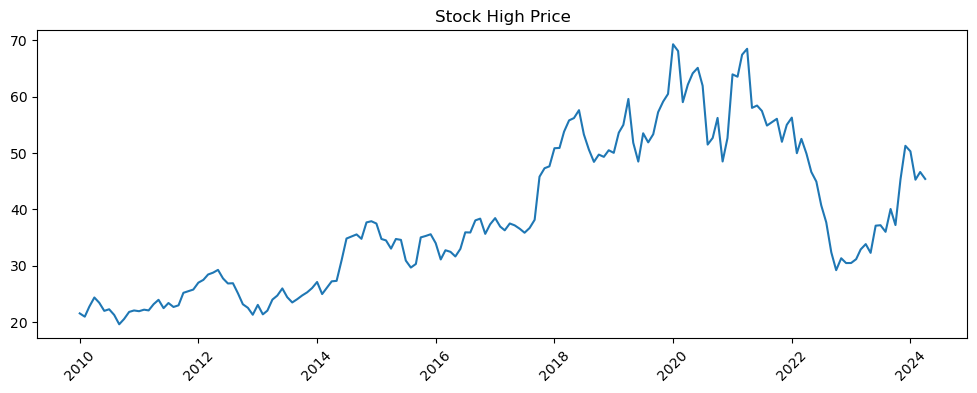

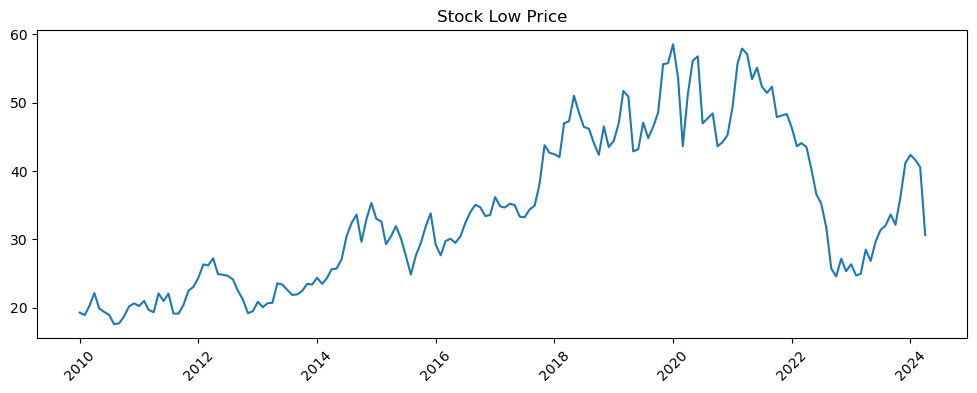

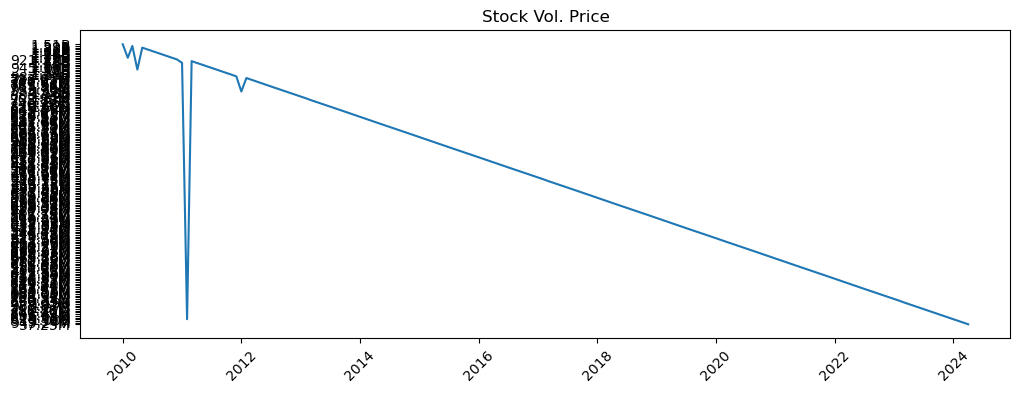

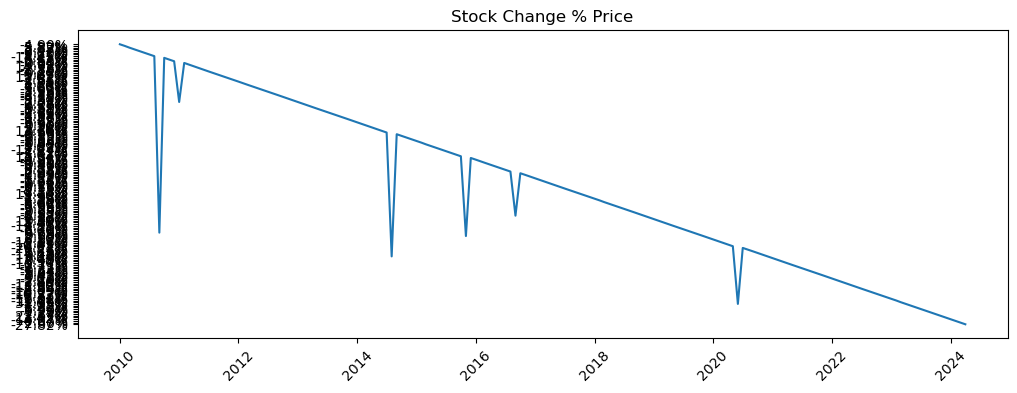

In [10]:
for columns in stock.columns:
    plt.figure(figsize=(12,4))
    plt.title(f"Stock {columns} Price")
    plt.plot(stock.index,stock[columns])
    plt.xticks(rotation=45)

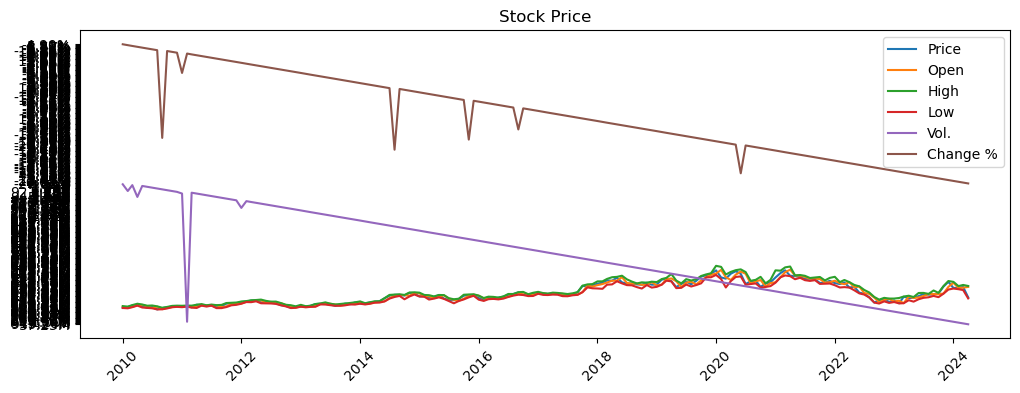

In [11]:
plt.figure(figsize=(12,4))
plt.title("Stock Price")
for columns in stock.columns:
    if(columns !='Volume'):
        plt.plot(stock.index,stock[columns],label=columns)
plt.xticks(rotation=45)
plt.legend()

In [13]:
stock=stock['Open']
stock.shape

(172,)

In [14]:
scaler=MinMaxScaler(feature_range=(0,1))

In [15]:
# df=scaler.fit_transform(np.array(data['open']).reshape(-1,1))
df=scaler.fit_transform(np.array(stock).reshape([stock.shape[0],1]))

In [16]:
def create_seq(stock,time_step=60):
    X=[]
    y=[]
    for i in range(len(stock)-time_step-1):
        X.append(stock[i:(i+time_step)])
        y.append(stock[i+time_step])
    return X,y


In [17]:
time_step=100
X,y=create_seq(df,time_step)
len(X),len(y)

(71, 71)

In [18]:
X=np.array(X)
X=X.reshape(X.shape[0],X.shape[1],1)
y=np.array(y)
X.shape,y.shape

((71, 100, 1), (71, 1))

In [19]:
X_train,X_test,y_train,y_test=X[:int(stock.shape[0]*0.8)],X[int(stock.shape[0]*0.8):],y[:int(stock.shape[0]*0.8)],y[int(stock.shape[0]*0.8):]


In [20]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape


((71, 100, 1), (0, 100, 1), (71, 1), (0, 1))

In [24]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=X_train[0].shape))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(32))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="mean_squared_error", metrics=[keras.metrics.RootMeanSquaredError()])

model.fit(X_train, y_train, epochs=100)


Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 140ms/step - loss: 0.0274 - root_mean_squared_error: 0.1744
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step - loss: 0.0071 - root_mean_squared_error: 0.0849
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - loss: 0.0103 - root_mean_squared_error: 0.1041
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 143ms/step - loss: 0.0081 - root_mean_squared_error: 0.0889
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 155ms/step - loss: 0.0081 - root_mean_squared_error: 0.0909
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - loss: 0.0067 - root_mean_squared_error: 0.0808
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - loss: 0.0071 - root_mean_squared_error: 0.0861
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - loss: 0.0056 - root_mean_squared_error: 0.0765
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - loss: 0.0067 - root_mean_squared_error: 0.0803
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - loss: 0.0053 - root_mean_squared_error: 0.076

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 235ms/step - loss: 9.4485e-04 - root_mean_squared_error: 0.0303 - val_loss: 0.0000e+00 - val_root_mean_squared_error: 0.0000e+00
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 180ms/step - loss: 8.9307e-04 - root_mean_squared_error: 0.0302 - val_loss: 0.0000e+00 - val_root_mean_squared_error: 0.0000e+00
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - loss: 9.7010e-04 - root_mean_squared_error: 0.0316 - val_loss: 0.0000e+00 - val_root_mean_squared_error: 0.0000e+00
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 0.0010 - root_mean_squared_error: 0.0322 - val_loss: 0.0000e+00 - val_root_mean_squared_error: 0.0000e+00
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 8.3770e-04 - root_mean_squared_error: 0.0299 - val_loss: 0.0000e+00 - val_root_mean_squared_error: 0.0000e+00
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - loss: 0.0011 - root_mean_squared_error: 0.0325 - val_loss: 0.0000e+00 - val_root_mean_squared_error: 0.000

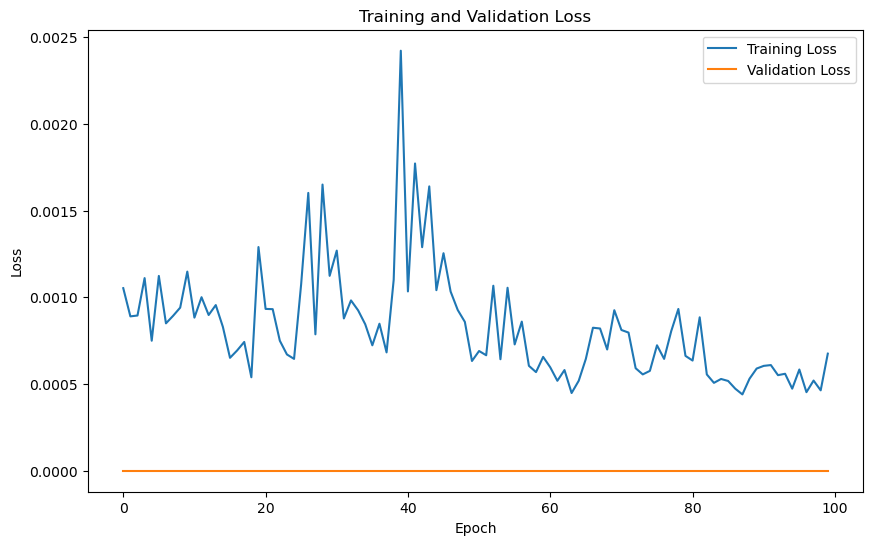

In [28]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

# Extract loss values from the training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the loss graph
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
